In [32]:
from cobra.io import read_sbml_model
yeast_model = read_sbml_model('models/iMM904_progesterone.xml') # import model of progesterone producing yeast strain
growth = yeast_model.reactions.BIOMASS_SC5_notrace
progesterone = yeast_model.reactions.R02216

yeast_model

Name,iMM904
Memory address,0x0218c31a31f0
Number of metabolites,1234
Number of reactions,1585
Number of groups,0
Objective expression,1.0*BIOMASS_SC5_notrace - 1.0*BIOMASS_SC5_notrace_reverse_93090
Compartments,"cytosol, extracellular space, mitochondria, peroxisome/glyoxysome, endoplasmic reticulum, vacuole, golgi apparatus, nucleus"


In [33]:
yeast_model.medium # nutrients available in medium

{'EX_fe2_e': 999999.0,
 'EX_glc__D_e': 10.0,
 'EX_h2o_e': 999999.0,
 'EX_h_e': 999999.0,
 'EX_k_e': 999999.0,
 'EX_na1_e': 999999.0,
 'EX_so4_e': 999999.0,
 'EX_nh4_e': 999999.0,
 'EX_o2_e': 2.0,
 'EX_pi_e': 999999.0}

In [47]:
medium = yeast_model.medium
medium["EX_glc__D_e"] = 1000 # a lot of glucose is available
medium["EX_o2_e"] = 1000 # a lot of oxygen is available
yeast_model.medium = medium

yeast_model.medium

{'EX_fe2_e': 999999.0,
 'EX_glc__D_e': 1000,
 'EX_h2o_e': 999999.0,
 'EX_h_e': 999999.0,
 'EX_k_e': 999999.0,
 'EX_na1_e': 999999.0,
 'EX_so4_e': 999999.0,
 'EX_nh4_e': 999999.0,
 'EX_o2_e': 1000,
 'EX_pi_e': 999999.0}

In [48]:
from cobra.flux_analysis import production_envelope

prod_env_growth = production_envelope(yeast_model, ["EX_glc__D_e", "EX_o2_e"], objective=growth)
prod_env_growth

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e,EX_o2_e
0,EX_glc__D_e,0.0,0.0,NaN,54.829111,5.745196,NaN,-1000.000000,-1000.000000
1,EX_glc__D_e,0.0,0.0,NaN,53.193156,5.573774,NaN,-1000.000000,-947.368421
2,EX_glc__D_e,0.0,0.0,NaN,51.557200,5.402353,NaN,-1000.000000,-894.736842
3,EX_glc__D_e,0.0,0.0,NaN,49.921244,5.230931,NaN,-1000.000000,-842.105263
4,EX_glc__D_e,0.0,0.0,NaN,48.285288,5.059510,NaN,-1000.000000,-789.473684
...,...,...,...,...,...,...,...,...,...
395,EX_glc__D_e,NaN,NaN,NaN,NaN,NaN,NaN,-0.058824,-210.526316
396,EX_glc__D_e,NaN,NaN,NaN,NaN,NaN,NaN,-0.058824,-157.894737
397,EX_glc__D_e,NaN,NaN,NaN,NaN,NaN,NaN,-0.058824,-105.263158
398,EX_glc__D_e,NaN,NaN,NaN,NaN,NaN,NaN,-0.058824,-52.631579


ValueError: Argument Z must be 2-dimensional.

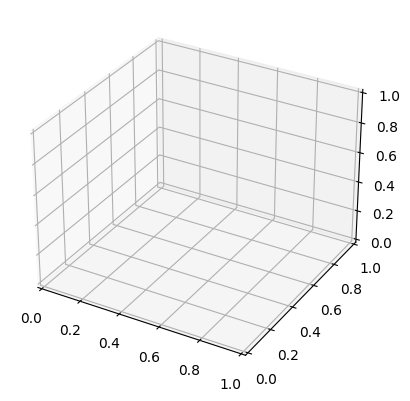

In [51]:
# prod_env_growth.plot(x='EX_glc__D_e', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", ylabel="Biomass objective [1/h]", grid = True)
#prod_env.plot(x='carbon_source', y='flux_maximum');
# prod_env_growth.plot_matplotlib();
# Set up plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
plot_prod_env_growth = ax.plot_surface(prod_env_growth['EX_glc__D_e'], prod_env_growth['EX_o2_e'], prod_env_growth['flux_maximum'], rstride=1, cstride=1, linewidth=0, antialiased=False, shade=False)

In [40]:
prod_env_prog = production_envelope(yeast_model, ["EX_glc__D_e", "EX_o2_e"], objective=progesterone)
prod_env_prog

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e,EX_o2_e
0,EX_glc__D_e,0.0,0.0,NaN,0.0,0.0,NaN,-1000.000000,-1000.000000
1,EX_glc__D_e,0.0,0.0,NaN,0.0,0.0,NaN,-1000.000000,-947.368421
2,EX_glc__D_e,0.0,0.0,NaN,0.0,0.0,NaN,-1000.000000,-894.736842
3,EX_glc__D_e,0.0,0.0,NaN,0.0,0.0,NaN,-1000.000000,-842.105263
4,EX_glc__D_e,0.0,0.0,NaN,0.0,0.0,NaN,-1000.000000,-789.473684
...,...,...,...,...,...,...,...,...,...
395,EX_glc__D_e,NaN,NaN,NaN,NaN,NaN,NaN,-0.058824,-210.526316
396,EX_glc__D_e,NaN,NaN,NaN,NaN,NaN,NaN,-0.058824,-157.894737
397,EX_glc__D_e,NaN,NaN,NaN,NaN,NaN,NaN,-0.058824,-105.263158
398,EX_glc__D_e,NaN,NaN,NaN,NaN,NaN,NaN,-0.058824,-52.631579


<AxesSubplot: xlabel='Glucose uptake [mmol/g DW/h]', ylabel='Progesterone'>

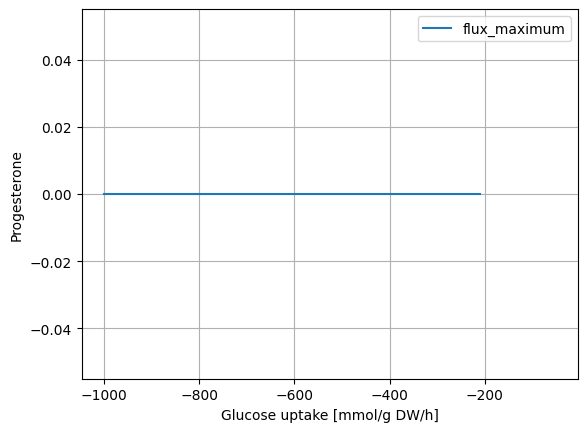

In [41]:
prod_env_prog.plot(x='EX_glc__D_e', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", ylabel="Progesterone", grid = True)

In [45]:
prod_env_growth_simple = production_envelope(yeast_model, "EX_glc__D_e", objective=growth)
prod_env_growth_simple

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e
0,EX_glc__D_e,0.0,0.0,NaN,27051.537585,2.834562e+00,NaN,-999999.000000
1,EX_glc__D_e,0.0,0.0,NaN,27051.537585,2.992038e+00,NaN,-947367.476780
2,EX_glc__D_e,0.0,0.0,NaN,27051.537585,3.168040e+00,NaN,-894735.953560
3,EX_glc__D_e,0.0,0.0,NaN,27051.537585,3.366043e+00,NaN,-842104.430341
4,EX_glc__D_e,0.0,0.0,NaN,27051.537585,3.590445e+00,NaN,-789472.907121
5,EX_glc__D_e,0.0,0.0,NaN,27051.537585,3.846906e+00,NaN,-736841.383901
6,EX_glc__D_e,0.0,0.0,NaN,27051.537585,4.142822e+00,NaN,-684209.860681
7,EX_glc__D_e,0.0,0.0,NaN,27051.537585,4.488057e+00,NaN,-631578.337461
8,EX_glc__D_e,0.0,0.0,NaN,27034.623075,4.893001e+00,NaN,-578946.814241
9,EX_glc__D_e,0.0,0.0,NaN,25715.860470,5.119749e+00,NaN,-526315.291022


<AxesSubplot: xlabel='Glucose uptake [mmol/g DW/h]', ylabel='Biomass objective [1/h]'>

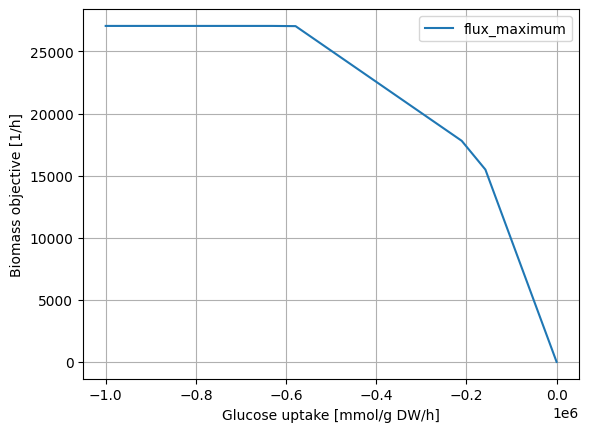

In [46]:
prod_env_growth_simple.plot(x='EX_glc__D_e', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", ylabel="Biomass objective [1/h]", grid = True)

In [ ]:
#data = phenotype_phase_plane.production_envelope(yeast_model, "EX_glc__D_e")
#print(data)
#data.plot_matplotlib();

#phenotypic_phase_plane(model, variables=[model.reactions.EX_glc__D_e], objective=model.metabolites.rHb_c) 

<AxesSubplot: xlabel='Glucose uptake [mmol/g DW/h]', ylabel='Biomass objective [1/h]'>

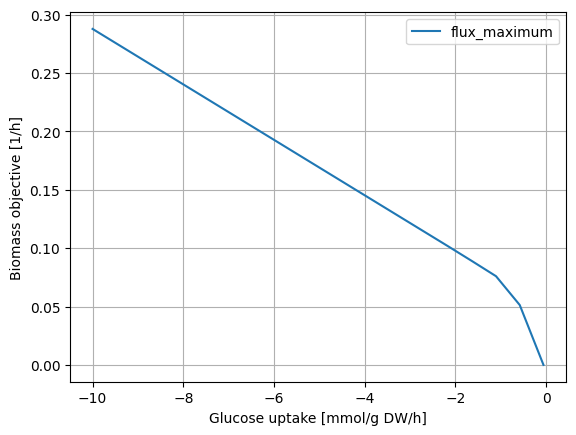

In [5]:
data.plot(x='EX_glc__D_e', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", ylabel="Biomass objective [1/h]", grid = True)